In [1]:
from fly_analysis import braidz
from fly_analysis import filtering
from fly_analysis.processing import extract_stimulus_centered_data
import numpy as np
from matplotlib import pyplot as plt
from fly_analysis.plotting import plot_mean_and_std
from fly_analysis.plotting import plot_trajectory
from datetime import datetime
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare

In [2]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20240927_140036.braidz")
df,csvs["opto"]


Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20240927_140036.braidz using pyarrow


(         obj_id    frame     timestamp         x         y         z  \
 0             1    46139  1.727439e+09  0.082663 -0.009540  0.033235   
 1             2    46142  1.727439e+09  0.076957 -0.003901  0.033755   
 2             3    46145  1.727439e+09  0.122295 -0.004836  0.173559   
 3             3    46146  1.727439e+09  0.168705  0.011538  0.376012   
 4             3    46147  1.727439e+09  0.222951  0.027658  0.600102   
 ...         ...      ...           ...       ...       ...       ...   
 8497902   76774  8254937  1.727521e+09 -0.107006 -0.179544  0.005537   
 8497903   76774  8254938  1.727521e+09 -0.107037 -0.179635  0.005567   
 8497904   76774  8254939  1.727521e+09 -0.107075 -0.179731  0.005605   
 8497905   76774  8254940  1.727521e+09 -0.107096 -0.179835  0.005630   
 8497906   76774  8254941  1.727521e+09 -0.107127 -0.179929  0.005661   
 
              xvel      yvel       zvel           P00           P01  \
 0       -2.162945 -2.475093   0.410402  1.276250e-

In [3]:
data = extract_stimulus_centered_data(df, csvs["opto"])
list(data)
AngV = data['angular_velocity']

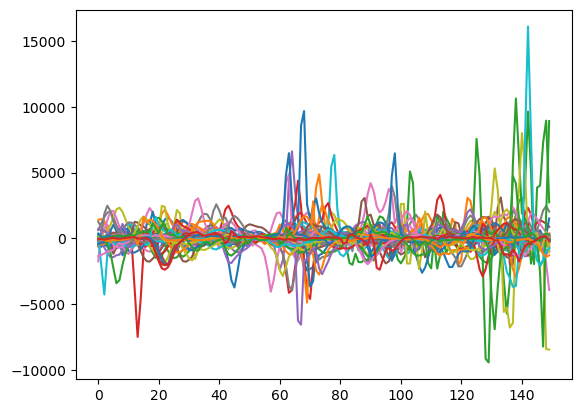

In [5]:
fig = plt.figure()
for d in AngV:
    plt.plot(d)

plt.show()

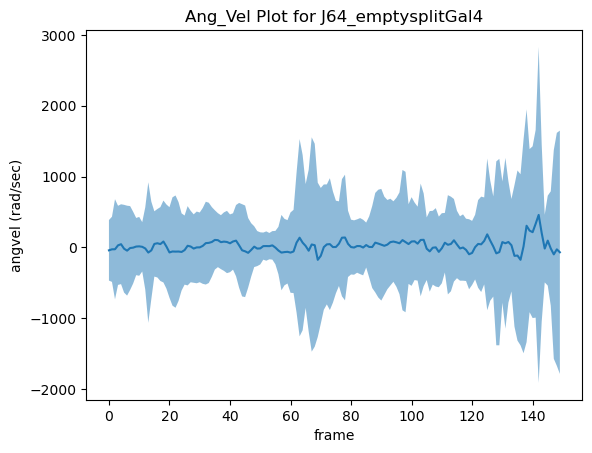

In [6]:
fig_combined, ax_combined = plt.subplots()
plot_mean_and_std(AngV, ax=ax_combined)
ax_combined.set_xlabel("frame")
ax_combined.set_ylabel("angvel (rad/sec)")
ax_combined.set_title("Ang_Vel Plot for J64_emptysplitGal4")
plt.show()

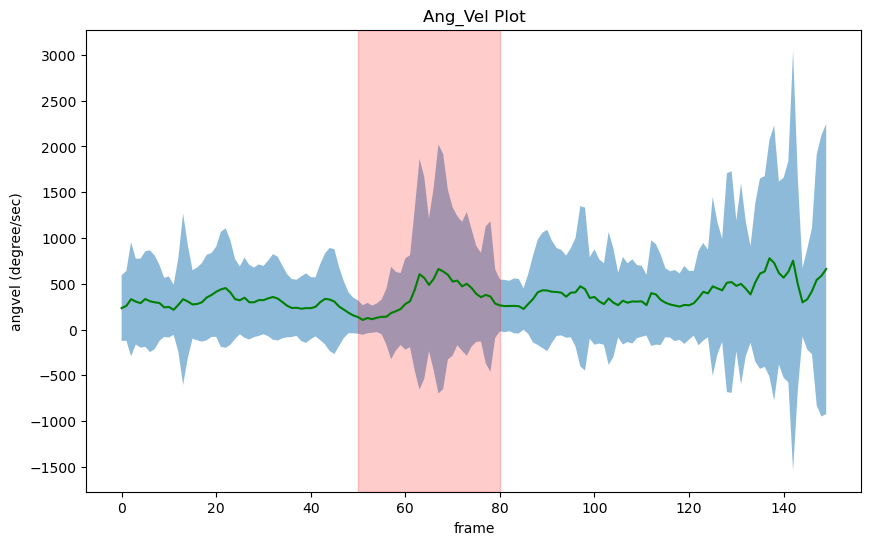

In [13]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the data
plot_mean_and_std(np.abs(AngV), ax=ax, label='AngV', color='green')

# Setting axis labels
ax.set_xlabel("frame")
ax.set_ylabel("angvel (degree/sec)")

# Adding a vertical span between frame 50 and 80
ax.axvspan(50, 80, color='red', alpha=0.2)

# Setting the y-axis to have ticks at intervals of 500
ax.yaxis.set_major_locator(ticker.MultipleLocator(500))

# Set the title
ax.set_title("Ang_Vel Plot")

# Display the plot
plt.show()
